# MultipleRegression_Weather

In [28]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("data/weather.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [29]:
data.describe(include="all")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


## DATA CLEANING

In [30]:
cols = [
    "Summary",
    "Precip Type",
    "Daily Summary",
    "Wind Bearing (degrees)",
    "Visibility (km)",
    "Loud Cover",
]
data = data.drop(cols, axis=1)

In [31]:
# Converting Formatted Date from Object to DateTimeObject.
data["Formatted Date"] = pd.to_datetime(data["Formatted Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Temperature (C)           5999 non-null   float64
 2   Apparent Temperature (C)  5999 non-null   float64
 3   Humidity                  5999 non-null   float64
 4   Wind Speed (km/h)         5999 non-null   float64
 5   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 281.3+ KB


In [32]:
# Indexing according to date and time and Setting Index.
idata = data.sort_values(by=["Formatted Date"])
idata = idata.set_index("Formatted Date")
idata.index

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [33]:
# removing duplicate values in the index
idata.index.drop_duplicates(keep="first")

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

## EXPLORATORY DATA ANALYSIS - Correlation in data

In [41]:
# checking correlation between the cols
data.corr()

C:\Users\cti110016\AppData\Local\Temp\ipykernel_28956\3173375495.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


C:\Users\cti110016\AppData\Local\Temp\ipykernel_28956\3663541877.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


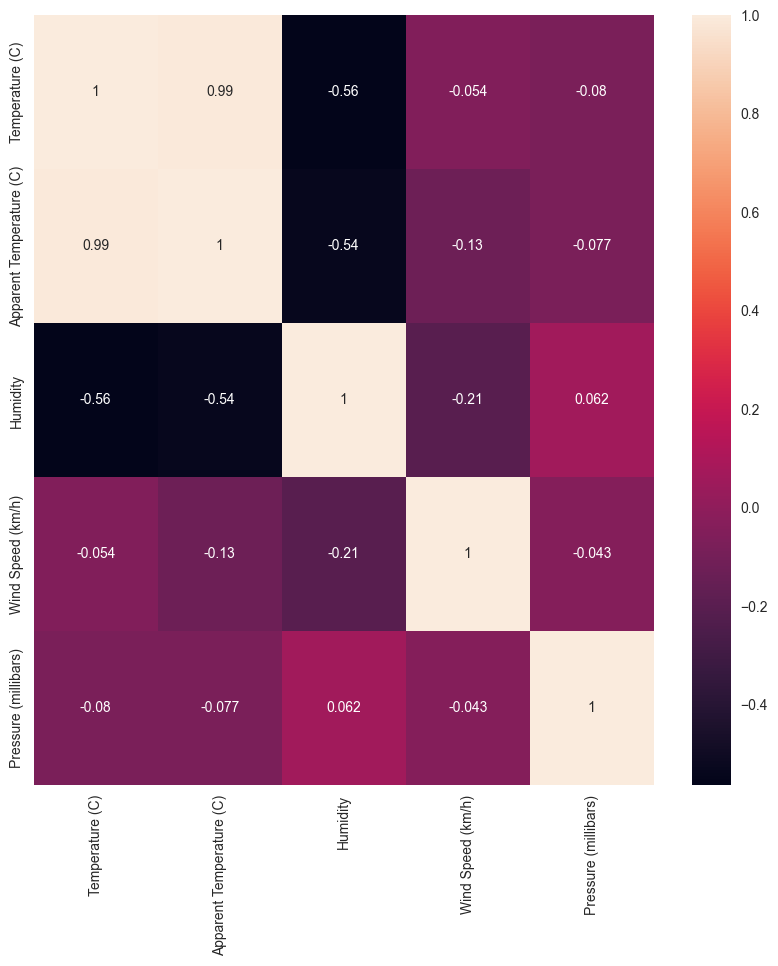

In [42]:
# plotting the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data Visualization

C:\Users\cti110016\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

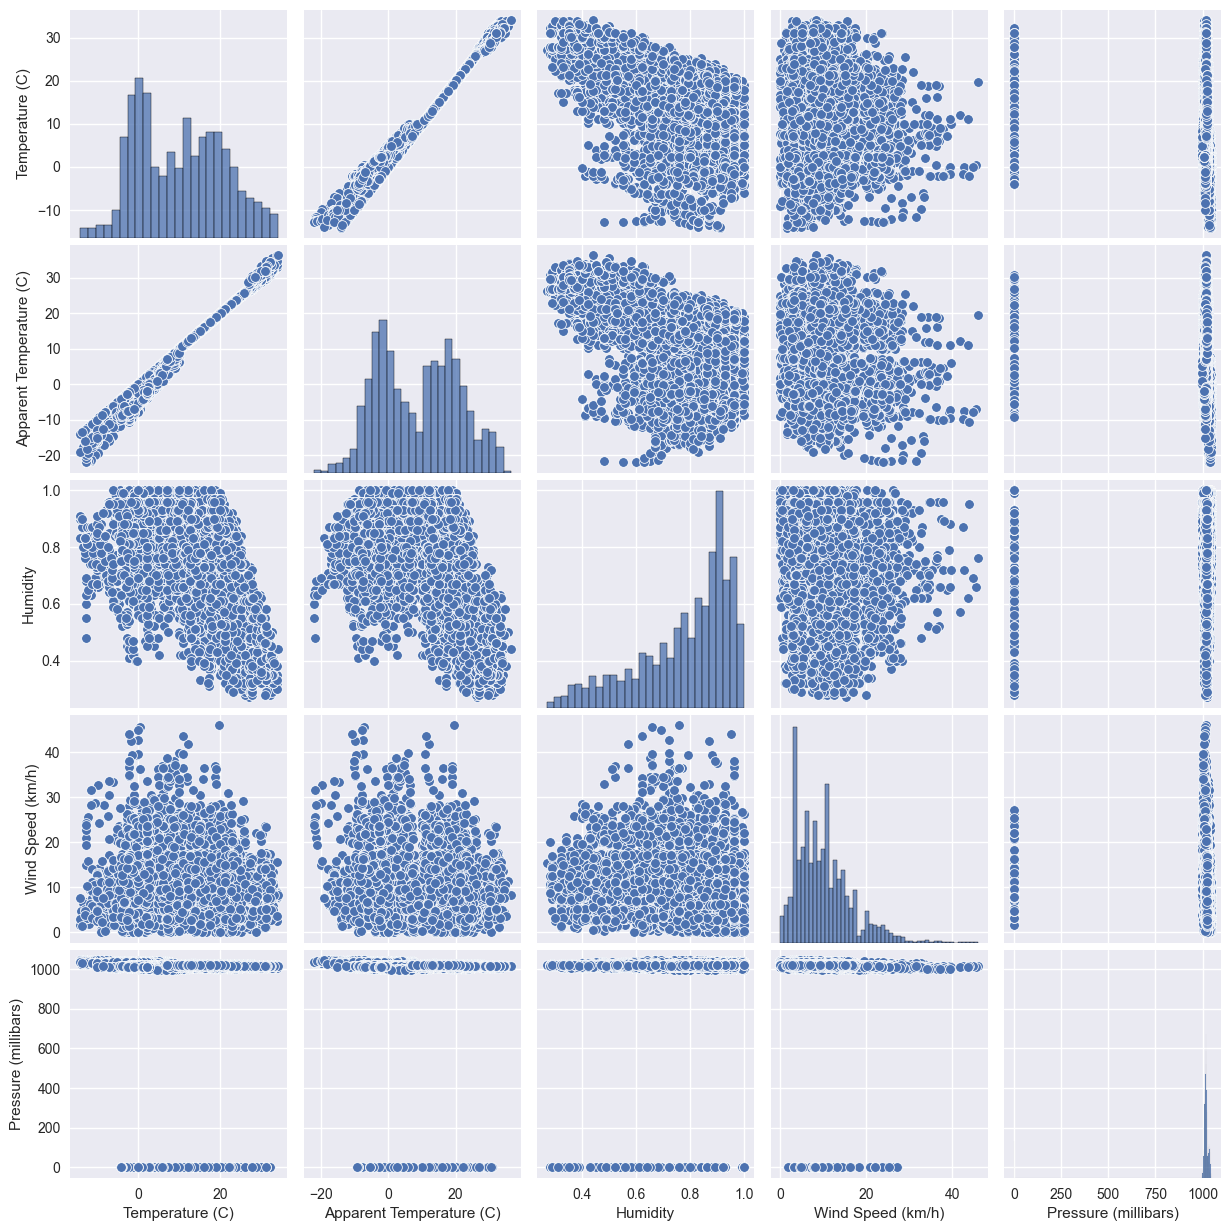

In [46]:
plt.figure(figsize=(20, 20))
sns.pairplot(data)
plt.show()

In [47]:
X = idata["2006-01-01":"2006-07-20"]  # taking 70% of the data for training
X1 = idata["2006-07-21":"2006-12-31"]  # 30% of data for testing

In [48]:
# taking cols for training the model
X_train = X[
    ["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Pressure (millibars)"]
]
Y_train = X["Apparent Temperature (C)"]
Y_train

Formatted Date
2006-01-01 00:00:00+00:00    -3.238889
2006-01-01 01:00:00+00:00    -3.155556
2006-01-01 02:00:00+00:00    -2.194444
2006-01-01 03:00:00+00:00    -2.744444
2006-01-01 04:00:00+00:00    -3.072222
                               ...    
2006-07-20 19:00:00+00:00    25.027778
2006-07-20 20:00:00+00:00    23.244444
2006-07-20 21:00:00+00:00    22.255556
2006-07-20 22:00:00+00:00    19.494444
2006-07-20 23:00:00+00:00    19.422222
Name: Apparent Temperature (C), Length: 4248, dtype: float64

In [49]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression()

In [50]:
# taking cols for testing
X_test = X1[
    ["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Pressure (millibars)"]
]
X_test.head()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-07-21 00:00:00+00:00,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,0.93,3.2200,1020.82


In [51]:
Y_test = X1["Apparent Temperature (C)"]
Y_test.head()

Formatted Date
2006-07-21 00:00:00+00:00    21.277778
2006-07-21 01:00:00+00:00    17.733333
2006-07-21 02:00:00+00:00    17.711111
2006-07-21 03:00:00+00:00    17.472222
2006-07-21 04:00:00+00:00    16.766667
Name: Apparent Temperature (C), dtype: float64

In [52]:
# predicting the Apparent Temperature
y_pred = regr.predict(X_test)
regr.score(X_test, Y_test)

0.992393474491749

### Showing the Actual Apparent Temperature and the predicted Apparent Temperature 

In [53]:
df = pd.DataFrame({"Actual": Y_test, "Predicted": y_pred})
df.head()

,Actual,Predicted
Formatted Date,,
2006-07-21 00:00:00+00:00,21.277778,22.563679
2006-07-21 01:00:00+00:00,17.733333,18.561591
2006-07-21 02:00:00+00:00,17.711111,18.096287
2006-07-21 03:00:00+00:00,17.472222,18.410439
2006-07-21 04:00:00+00:00,16.766667,17.459674


### Calculating the error in prediction 

In [54]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.8110788905226739
Mean Squared Error:  1.0493637098684727
Root Mean Squared Error:  1.0243845517521595
